# Total Solar Irradiance Data from NASA's Source Mission - Climate Science

Data characterisation and exploration

For more information regarding the raw data format:

http://lasp.colorado.edu/data/sorce/tsi_data/daily/sorce_tsi_L3_c24h_latest.txt 

## 1) Import relevant libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib as mplt

## 2) Load data 

Took the data - http://lasp.colorado.edu/data/sorce/tsi_data/daily/sorce_tsi_L3_c24h_latest.txt

Through preprocessing on excel from a txt file to this:

In [76]:
df = pd.read_csv("/Users/bakerkagimu/desktop/TSI.csv", );
df.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,20030225.5,2452696,2452696.409,0.0029,1361.4851,0.477,0.0068,0.0330,0.478,1389.1951,...,0.0068,0.0339,0.487,0,NaN,***DATA,"RECORDS***,",number,=,6210.0
1,20030226.5,2452697,2452697.000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,...,0.0000,0.0000,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN
2,20030227.5,2452698,2452698.007,0.0769,1361.4526,0.477,0.0068,0.0524,0.479,1388.0864,...,0.0068,0.0931,0.495,0,NaN,NaN,NaN,NaN,NaN,NaN
3,20030228.5,2452699,2452699.000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,...,0.0000,0.0000,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN
4,20030301.5,2452700,2452700.000,0.0000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,...,0.0000,0.0000,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
TSIstats = df.copy()

In [74]:
TSIstats.tail()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
6205,20200221.5,2458901,2458900.811,0.2217,1360.6554,0.608,0.0068,0.0696,0.612,1391.4982,...,0.0068,0.182,0.648,0,NaN,NaN,NaN,NaN,NaN,NaN
6206,20200222.5,2458902,2458901.836,0.2220,1360.6310,0.608,0.0068,0.0452,0.609,1390.8350,...,0.0068,0.148,0.638,0,NaN,NaN,NaN,NaN,NaN,NaN
6207,20200223.5,2458903,2458902.799,0.1882,1360.6291,0.608,0.0068,0.0476,0.609,1390.2294,...,0.0068,0.148,0.638,0,NaN,NaN,NaN,NaN,NaN,NaN
6208,20200224.5,2458904,2458903.959,0.2822,1360.6348,0.608,0.0068,0.0465,0.609,1389.5007,...,0.0068,0.198,0.651,0,NaN,NaN,NaN,NaN,NaN,NaN
6209,20200225.5,2458905,2458904.828,0.1697,1360.6126,0.608,0.0068,0.0544,0.610,1388.9237,...,0.0068,0.113,0.630,0,NaN,NaN,NaN,NaN,NaN,NaN


## 3) Source Empirical Daily Total Solar Irradiance (TSI) at 1-AU

In [90]:
TSIdaily = df[['5']].copy()
TSIdaily

,5
0,1361.4851
1,0.0000
2,1361.4526
3,0.0000
4,0.0000
...,...
6205,1360.6554
6206,1360.6310
6207,1360.6291
6208,1360.6348


## 4) Itterative ARIMA estimation for TSI

In [92]:
import pmdarima as pmd
def arimamodel(TSIdaily):
    autoarima_model = pmd.auto_arima(TSIdaily, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model
arima_model = arimamodel(TSIdaily)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=77930.558, Time=2.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=88648.587, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78134.182, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=83856.072, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=106909.582, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=77933.216, Time=1.86 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=77937.471, Time=1.50 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=81693.225, Time=1.65 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=77934.972, Time=1.21 sec


/Users/bakerkagimu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/bakerkagimu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=77934.343, Time=3.87 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=78106.049, Time=0.48 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 14.799 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6210
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -38961.279
Date:                Fri, 15 Jan 2021   AIC                          77930.558
Time:                        02:47:03   BIC                          77957.494
Sample:                             0   HQIC                         77939.896
                               - 6210                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     78.4991      5.580     14.069      0.000      67.563      89.435
ar.L1          0.9391      0.008    115.647      0.000       0.923       0.955
ma.L1         -0.2010      0.004    -55.744      0.000      -0.208      -0.194
sigma2      1.648e+04    174.434     94.463      0.000    1.61e+04    1.68e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2097042.27
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                            -1.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        92.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 5) Plot daily TSI

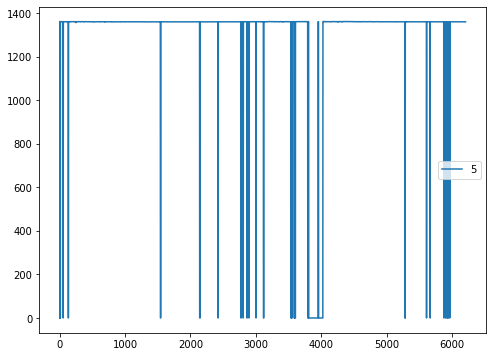

In [139]:
from matplotlib import pyplot
TSIdaily.plot()
pyplot.show()


## 6) Values below 800 should be taken out, average TSI = 1365 w/m^2 at 1 AU 

In [102]:
TSI = df[800<df['5']]

In [103]:
print(TSI)

               1        2            3       4          5      6       7  \
0     20030225.5  2452696  2452696.409  0.0029  1361.4851  0.477  0.0068   
2     20030227.5  2452698  2452698.007  0.0769  1361.4526  0.477  0.0068   
8     20030305.5  2452704  2452703.583  0.0561  1361.3010  0.477  0.0068   
10    20030307.5  2452706  2452706.022  0.4405  1361.3560  0.477  0.0068   
11    20030308.5  2452707  2452706.757  0.3628  1361.3339  0.477  0.0068   
...          ...      ...          ...     ...        ...    ...     ...   
6205  20200221.5  2458901  2458900.811  0.2217  1360.6554  0.608  0.0068   
6206  20200222.5  2458902  2458901.836  0.2220  1360.6310  0.608  0.0068   
6207  20200223.5  2458903  2458902.799  0.1882  1360.6291  0.608  0.0068   
6208  20200224.5  2458904  2458903.959  0.2822  1360.6348  0.608  0.0068   
6209  20200225.5  2458905  2458904.828  0.1697  1360.6126  0.608  0.0068   

           8      9         10  ...      12      13     14  15  Unnamed: 15  \
0     0.

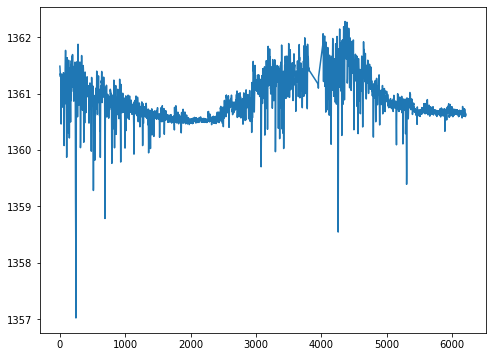

In [95]:
TSI['5'].plot()

## 7 Violin plot provides:

- Median
- Interquartile ranges
- Distribution
- Spread

In [106]:
var = TSI['5']

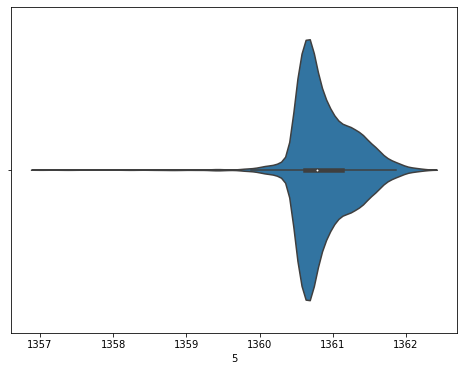

In [107]:
sns.violinplot(var)

## 8) Check distribution 

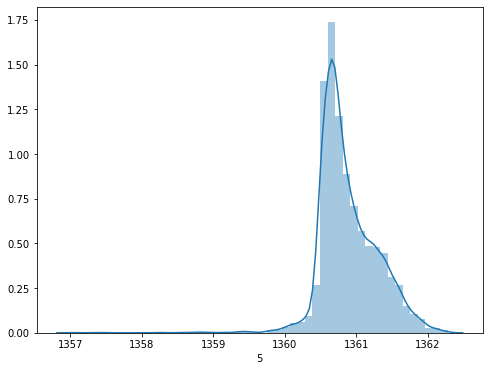

In [108]:
import seaborn as sns
sns.distplot(TSI['5'])

Would have hoped for normally distributed at 1365 w/m^2

## 9) Check for stationariy: Augmented Dickey-Fuller test

Null hypothesis that the time series is non-stationary, ie either of the mean, variance and covariance vary with time

Ideally we can reject the null hypothesis at the 1 - 10% significant level(s)

In [110]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
result = adfuller(var)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.091967
p-value: 0.000999
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


## 9a) ADF Test

We can reject the null hypothesis at the 1-10% confidence interval.

Low p-value suggests it is highly unlikely that the observed time series came about by chance

## 10) Source Standard deviation

In [115]:
TSI_standard_deviation = df["8"]

In [116]:
max(TSI_standard_deviation)

0.535

In [120]:
min(TSI_standard_deviation)

0.0

## 11) Check Distribution of TSI without zero values

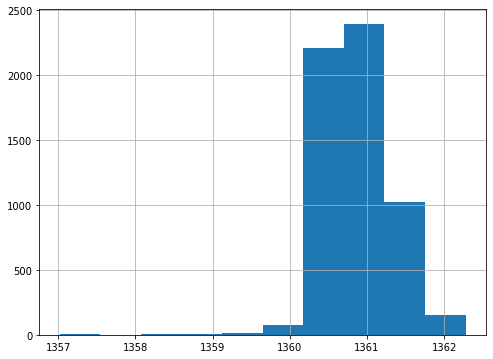

In [143]:
var.hist()

In [144]:
min(var)

1357.0188

In [145]:
max(var)

1362.2784

## 12) Plot standard deviation

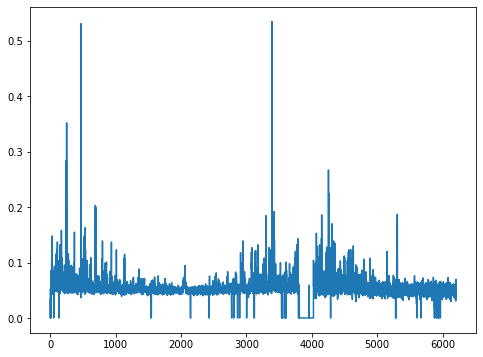

In [122]:
standard_deviation.plot()

## 13) Total Uncertainty in TSI at Earth 

In [146]:
Ucern = df['14']

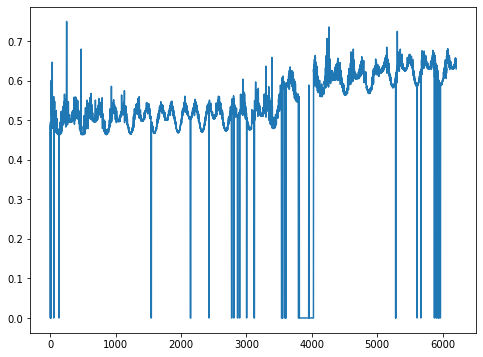

In [147]:
Ucern.plot()

Need to remove zeros